# library install

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from scipy.signal import periodogram

# definitions

In [3]:
# 時系列をプロットする関数
def plot_time_series(series, title):
    plt.figure(figsize=(10, 2))
    plt.plot(series)
    plt.title(title)
    plt.grid(True)
    plt.show()

# コレログラム(自己相関関数)をプロットする関数
def plot_acf(series, lags, title):
    fig, ax = plt.subplots(figsize=(8, 4))
    sm.graphics.tsa.plot_acf(series, lags=lags, ax=ax)
    plt.title(title)
    plt.show()

# 偏自己相関関数をプロットする関数
def plot_pacf(series, lags, title):
    fig, ax = plt.subplots(figsize=(8, 4))
    sm.graphics.tsa.plot_pacf(series, lags=lags, ax=ax)
    plt.title(title)
    plt.show()

# スペクトル密度関数をプロットする関数
def plot_spectrum(series, title):
    f, Pxx = periodogram(series)
    plt.figure(figsize=(8, 4))
    plt.semilogy(f, Pxx)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.grid(True)
    plt.show()

# AR(1) モデルの時系列データ生成
def generate_ar1(phi, n):
    ar = np.array([1, -phi])  # AR(1)の係数
    ma = np.array([1])        # MA(0)
    arma_process = ArmaProcess(ar, ma)
    return arma_process.generate_sample(nsample=n)

# MA(1) モデルの時系列データ生成
def generate_ma1(theta, n):
    ar = np.array([1])        # AR(0)
    ma = np.array([1, theta]) # MA(1)の係数
    arma_process = ArmaProcess(ar, ma)
    return arma_process.generate_sample(nsample=n)

# ARMA(1,1) モデルの時系列データ生成
def generate_arma11(phi, theta, n):
    ar = np.array([1, -phi])   # AR(1)の係数
    ma = np.array([1, theta])  # MA(1)の係数
    arma_process = ArmaProcess(ar, ma)
    return arma_process.generate_sample(nsample=n)

# param setting

In [4]:
# パラメータ設定
n_samples = 500  # サンプル数

# AR(1)

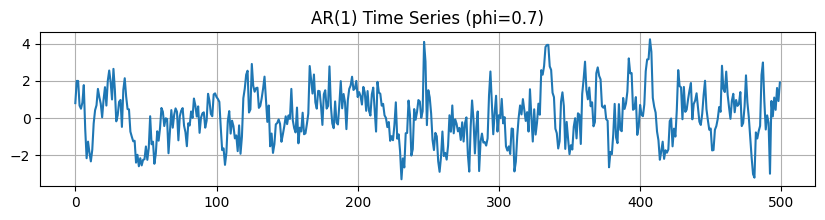

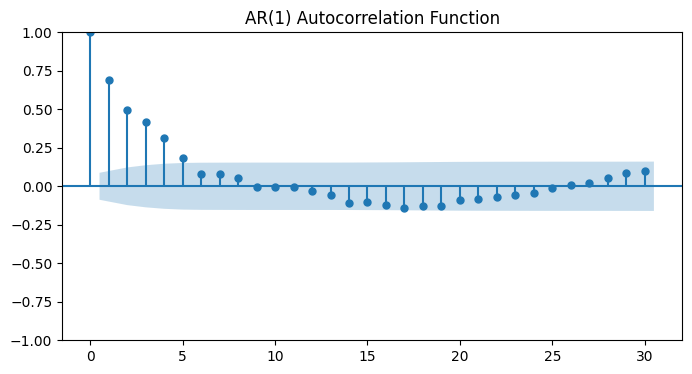

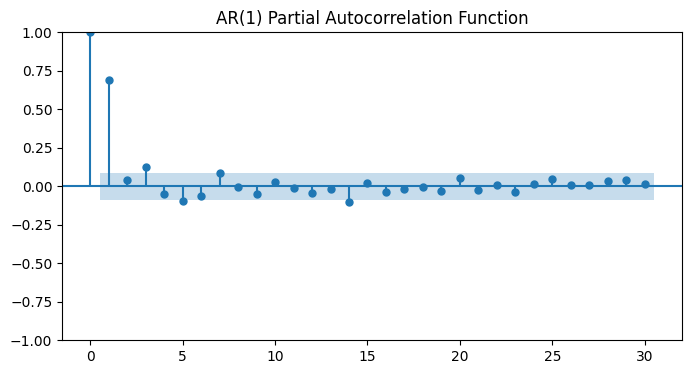

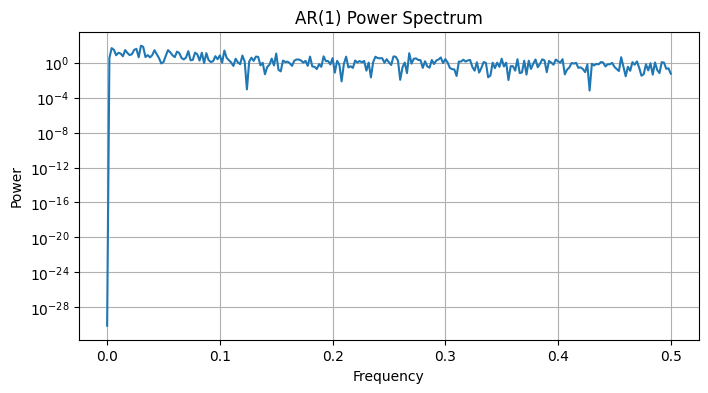

In [5]:
# AR(1) モデルのプロット
ar1_series = generate_ar1(phi=0.7, n=n_samples)
plot_time_series(ar1_series, 'AR(1) Time Series (phi=0.7)')
plot_acf(ar1_series, lags=30, title='AR(1) Autocorrelation Function')
plot_pacf(ar1_series, lags=30, title='AR(1) Partial Autocorrelation Function')
plot_spectrum(ar1_series, title='AR(1) Power Spectrum')

# MA(1)

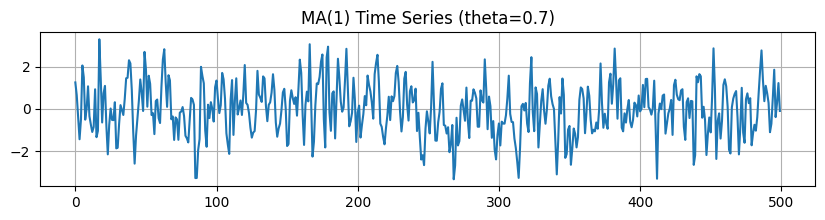

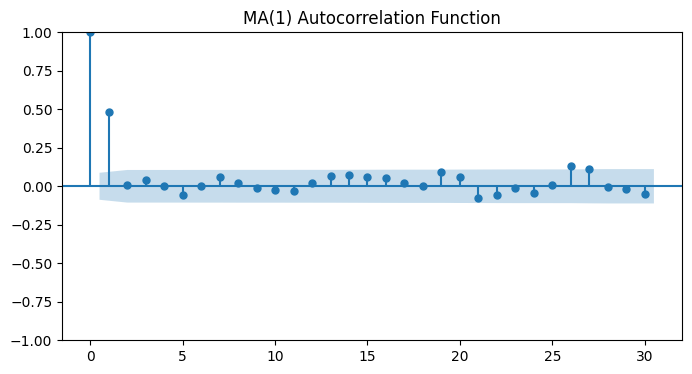

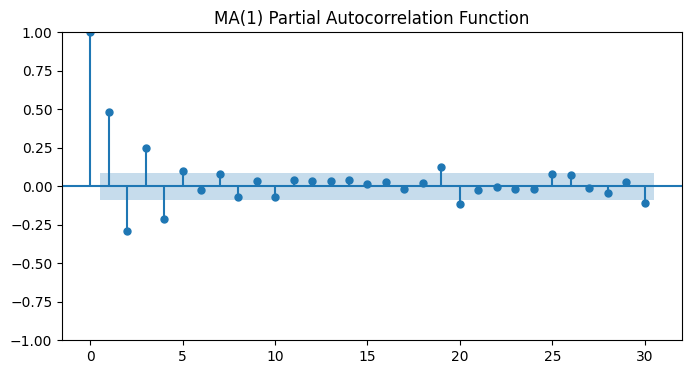

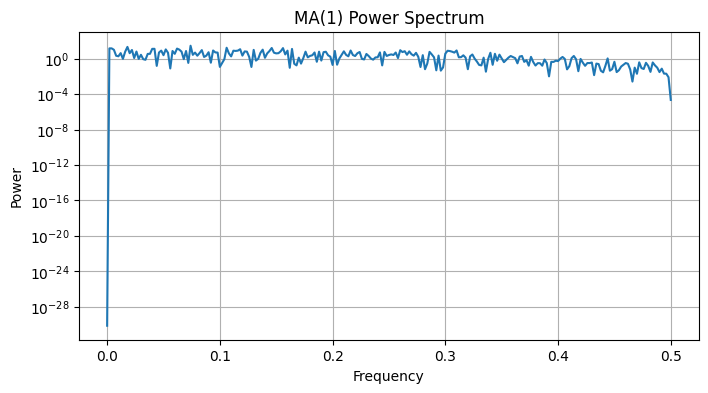

In [6]:
# MA(1) モデルのプロット
ma1_series = generate_ma1(theta=0.7, n=n_samples)
plot_time_series(ma1_series, 'MA(1) Time Series (theta=0.7)')
plot_acf(ma1_series, lags=30, title='MA(1) Autocorrelation Function')
plot_pacf(ma1_series, lags=30, title='MA(1) Partial Autocorrelation Function')
plot_spectrum(ma1_series, title='MA(1) Power Spectrum')

# ARMA(1,1)

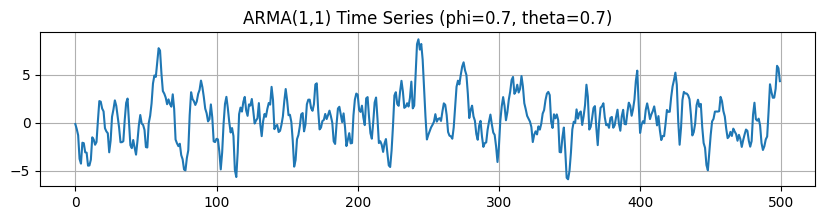

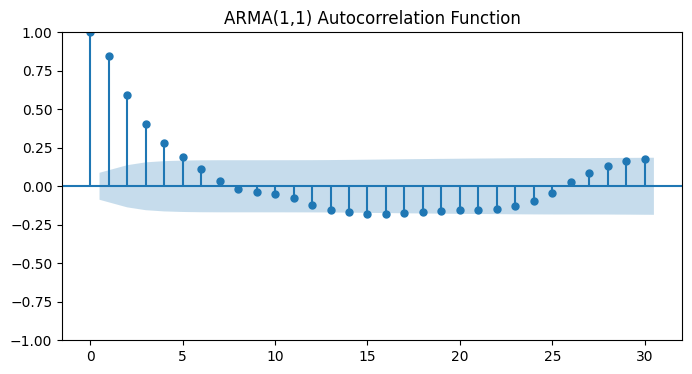

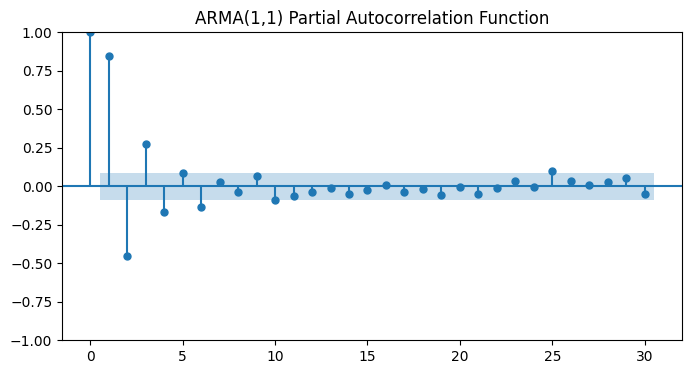

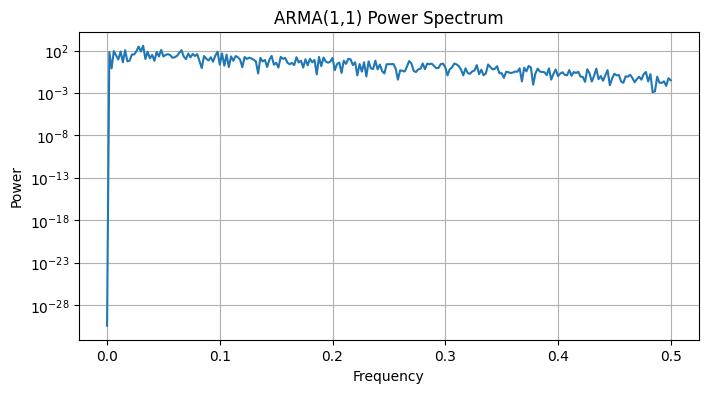

In [7]:
# ARMA(1,1) モデルのプロット
arma11_series = generate_arma11(phi=0.7, theta=0.7, n=n_samples)
plot_time_series(arma11_series, 'ARMA(1,1) Time Series (phi=0.7, theta=0.7)')
plot_acf(arma11_series, lags=30, title='ARMA(1,1) Autocorrelation Function')
plot_pacf(arma11_series, lags=30, title='ARMA(1,1) Partial Autocorrelation Function')
plot_spectrum(arma11_series, title='ARMA(1,1) Power Spectrum')